## Some plots of the output

Spectra, percentiles (real and predicted) and some components of the latents

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
wave=np.load('./saved_input/waves.npy')
x_test=np.load('./saved_model/generate_latent_2/latent_16/seds_test.npy')
y_test=np.load('./saved_model/generate_latent_2/latent_16/y_test.npy')
ys_=np.load('./saved_model/generate_latent_2/latent_16/y_test_pred.npy')
latents=np.load('./saved_model/generate_latent_2/latent_16/latents.npy')[0]
print(np.shape(y_test),np.shape(ys_),np.shape(latents))

(1, 1000, 9) (1, 1000, 9) (1000, 16)


Index 786
Index 296
Index 115
Index 220
Index 338
Index 218
Index 252
Index 923
Index 821
Index 929


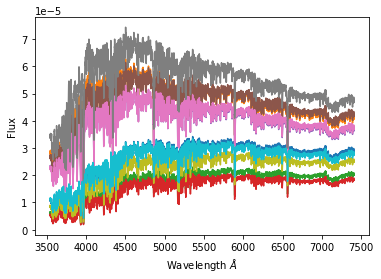

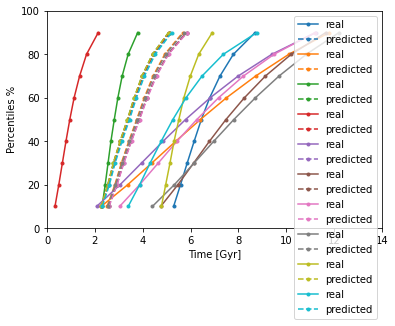

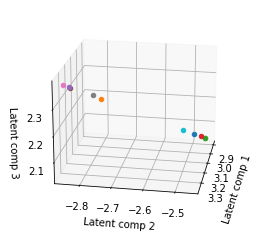

In [15]:
ind=np.random.choice(np.arange(1000),size=10)
color=['tab:blue','tab:orange','tab:green','tab:red','tab:purple','tab:brown','tab:pink','tab:gray','tab:olive','tab:cyan','gold']

#999 works pretty well
#spectrum
for i,index in enumerate(ind):
    print('Index '+str(index))
    plt.plot(wave,x_test[index,:],color=color[i])
plt.xlabel('Wavelength $\\AA$')
plt.ylabel('Flux')
plt.show()

#percentiles vs time
for i,index in enumerate(ind):
    plt.plot(y_test[0][index,:],np.arange(10,100,10),'.-',label='real',color=color[i])
    plt.plot(ys_[0][index,:],np.arange(10,100,10),'.--',label='predicted',color=color[i])
plt.ylabel('Percentiles %')
plt.xlabel('Time [Gyr]')
plt.xlim(0,14)
plt.ylim(0,100)
plt.legend()
plt.show()


#latent space (1,2,3)
plt.figure()
ax = plt.axes(projection='3d')
for i,index in enumerate(ind):
    ax.scatter3D(latents[index,4],latents[index,5],latents[index,6],color=color[i])
ax.set_xlabel('Latent comp 1')
ax.set_ylabel('Latent comp 2')
ax.set_zlabel('Latent comp 3')
ax.view_init(20, 10)
plt.show()

#predicts bad the 'young population'


## Embedding the latents

We need to visualize better percentiles. We use the UMAP tool.

In [16]:
#!pip install umap-learn
import umap.umap_ as umap
reducer = umap.UMAP()
embed = reducer.fit_transform(latents) #train each time, if not, just transform


/opt/python/python3.8/lib/python3.8/site-packages/numba/np/ufunc/parallel.py:365: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


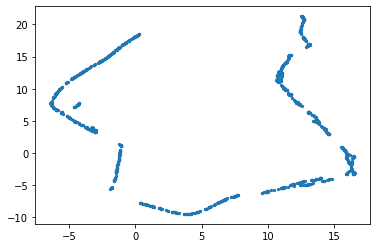

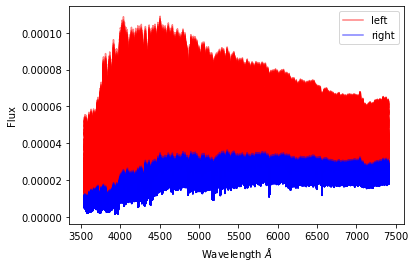

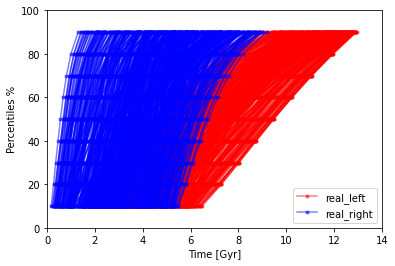

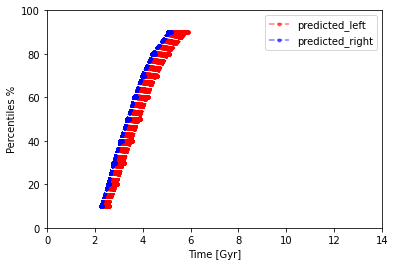

In [17]:
# no coloring
plt.scatter(embed[:,0], embed[:,1], s=5, c='tab:blue', rasterized=True)
plt.show()

#left vs right division : we see mainly due to new stars (recent SF) vs old stars (old SF)

left=np.where(embed[:,0]<0)[0]
right=np.where(embed[:,0]>2.5)[0]

#left=[np.argmax(embed[left,0])]
#right=[np.argmin(embed[right,0])]

for l in left:
    if l==left[0]:
        plt.plot(wave,x_test[l,:],color='r',label='left',alpha=0.5)
    else:
        plt.plot(wave,x_test[l,:],color='r',alpha=0.5)
#plt.show()        
for r in right:
    if r==right[0]:
        plt.plot(wave,x_test[r,:],color='b',label='right',alpha=0.5)
    else:
        plt.plot(wave,x_test[r,:],color='b',alpha=0.5)
        

plt.xlabel('Wavelength $\\AA$')
plt.ylabel('Flux')
plt.legend()
plt.show()


for l in left:
    if l==left[0]:
        plt.plot(y_test[0][l,:],np.arange(10,100,10),'.-',label='real_left',color='r',alpha=0.5)
    else:
        plt.plot(y_test[0][l,:],np.arange(10,100,10),'.-',color='r',alpha=0.5)
#plt.show()        
for r in right:
    if r==right[0]:
        plt.plot(y_test[0][r,:],np.arange(10,100,10),'.-',label='real_right',color='b',alpha=0.5)
    else:
        plt.plot(y_test[0][r,:],np.arange(10,100,10),'.-',color='b',alpha=0.5)
        
plt.ylabel('Percentiles %')
plt.xlabel('Time [Gyr]')
plt.xlim(0,14)
plt.ylim(0,100)
plt.legend()
plt.show()


for l in left:
    if l==left[0]:
        plt.plot(ys_[0][l,:],np.arange(10,100,10),'.--',label='predicted_left',color='r',alpha=0.5)
    else:
        plt.plot(ys_[0][l,:],np.arange(10,100,10),'.--',color='r',alpha=0.5)
    
#plt.show()
for r in right:
    if r==right[0]:
        plt.plot(ys_[0][r,:],np.arange(10,100,10),'.--',label='predicted_right',color='b',alpha=0.5)
    else:
        plt.plot(ys_[0][r,:],np.arange(10,100,10),'.--',color='b',alpha=0.5)
        
plt.ylabel('Percentiles %')
plt.xlabel('Time [Gyr]')
plt.xlim(0,14)
plt.ylim(0,100)
plt.legend()
plt.show()



(313,) (180,)


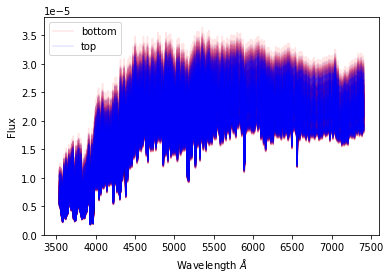

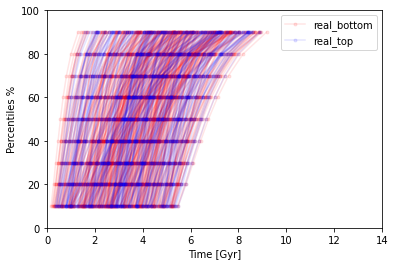

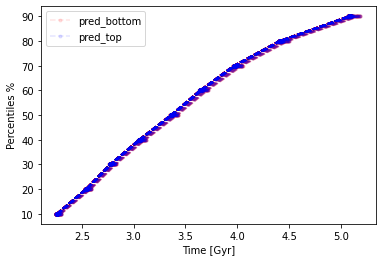

In [18]:
#top versus bottom division (inside right): not clear! maybe a specific region?
embed_r=embed[right,:]

#restricting even more the x axis, to avoid more bottom points at the left
embed_r=embed_r[np.where(embed_r[:,0]>7.5)[0],:] 

bottom=np.where(embed_r[:,1]<10)[0]
top=np.where(embed_r[:,1]>10)[0]

#keeping just the right points
x_test_r=x_test[right,:]
y_test_r=y_test[0][right,:]
y_test_pred_r=ys_[0][right,:]

print(np.shape(bottom),np.shape(top))


for b in bottom:
    if b==bottom[0]:
        plt.plot(wave,x_test_r[b,:],color='r',label='bottom',alpha=0.1)
    else:
        plt.plot(wave,x_test_r[b,:],color='r',alpha=0.1)
        
for t in top:
    if t==top[0]:
        plt.plot(wave,x_test_r[t,:],color='b',label='top',alpha=0.1)
    else:
        plt.plot(wave,x_test_r[t,:],color='b',alpha=0.1)
        
    


plt.xlabel('Wavelength $\\AA$')
plt.ylabel('Flux')
plt.legend()
plt.show()


for b in bottom:
    if b==bottom[0]:
        plt.plot(y_test_r[b,:],np.arange(10,100,10),'.-',label='real_bottom',color='r',alpha=0.1)
    else:
        plt.plot(y_test_r[b,:],np.arange(10,100,10),'.-',color='r',alpha=0.1)
       
for t in top:
    if t==top[0]:
        plt.plot(y_test_r[t,:],np.arange(10,100,10),'.-',label='real_top',color='b',alpha=0.1)
    else:
        plt.plot(y_test_r[t,:],np.arange(10,100,10),'.-',color='b',alpha=0.1)
        
plt.ylabel('Percentiles %')
plt.xlabel('Time [Gyr]')
plt.xlim(0,14)
plt.ylim(0,100)
plt.legend()
plt.show()

for b in bottom:
    if b==bottom[0]:
        plt.plot(y_test_pred_r[b,:],np.arange(10,100,10),'.--',label='pred_bottom',color='r',alpha=0.1)
    else:
        plt.plot(y_test_pred_r[b,:],np.arange(10,100,10),'.--',color='r',alpha=0.1)
#plt.show()      
for t in top:
    if t==top[0]:
        plt.plot(y_test_pred_r[t,:],np.arange(10,100,10),'.--',label='pred_top',color='b',alpha=0.1)
    else:
        plt.plot(y_test_pred_r[t,:],np.arange(10,100,10),'.--',color='b',alpha=0.1)
        
plt.ylabel('Percentiles %')
plt.xlabel('Time [Gyr]')
#plt.xlim(0,14)
#plt.ylim(0,100)
plt.legend()
plt.show()



In [19]:
#which is the shape of the actual seds (no latents) - maybe too much dimensions to represent, but let's see

embed_sed = reducer.fit_transform(x_test)


(1000, 2)


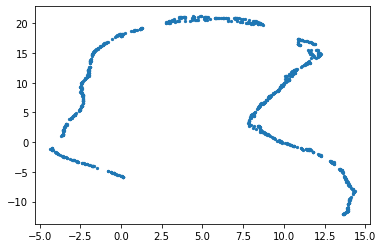

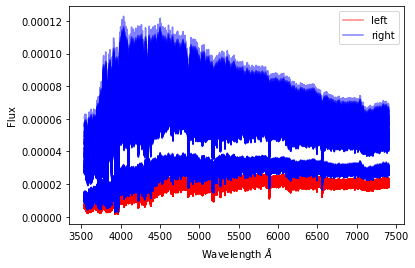

In [20]:
print(np.shape(embed_sed))
plt.scatter(embed_sed[:,0], embed_sed[:,1], s=5, c='tab:blue', rasterized=True)
plt.show()

left=np.where(embed_sed[:,0]<0)[0]
right=np.where(embed_sed[:,0]>10)[0]

for l in left:
    if l==left[0]:
        plt.plot(wave,x_test[l,:],color='r',label='left',alpha=0.5)
    else:
        plt.plot(wave,x_test[l,:],color='r',alpha=0.5)
      
for r in right:
    if r==right[0]:
        plt.plot(wave,x_test[r,:],color='b',label='right',alpha=0.5)
    else:
        plt.plot(wave,x_test[r,:],color='b',alpha=0.5)
        

plt.xlabel('Wavelength $\\AA$')
plt.ylabel('Flux')
plt.legend()
plt.show()



## Halpha

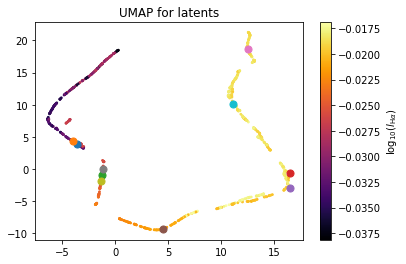

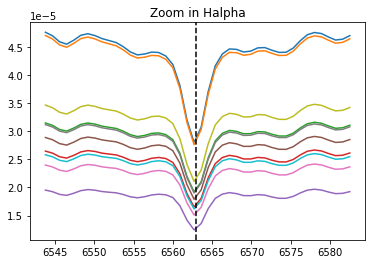

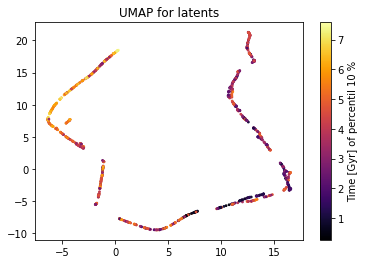

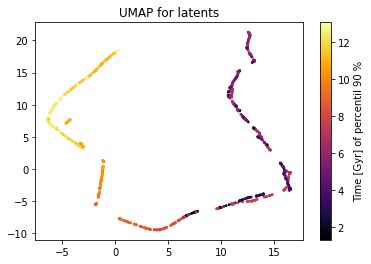

In [41]:
#lets try to see the dependance of the UMAP for latents with halpha

# Halpha

def l(l_center=6563,delta=20):
    sel = (wave > l_center-delta) & (wave < l_center+delta)
    diff = x_test[:,sel]
    #print(np.shape(diff),np.shape(np.sum(diff,axis=1)),np.shape(np.median(x_test,axis=1)))
    #return np.sum(diff,axis=1)/np.median(x_test,axis=1)
    #return np.sum(diff,axis=1)/np.max(x_test,axis=1)
    near=(wave > l_center-200) & (wave < l_center+200)
    return np.mean(diff,axis=1) / np.median(x_test[:,near],axis=1)

color=['tab:blue','tab:orange','tab:green','tab:red','tab:purple','tab:brown','tab:pink','tab:gray','tab:olive','tab:cyan','gold']


#the maximum is to avoid divergences
plt.scatter(embed[:,0], embed[:,1], s=3, c=np.log10(np.maximum(1e-2,l(l_center=6563))), rasterized=True, cmap='inferno')
plt.colorbar(label=r'$\log_{10}(l_{\mathrm{H}\alpha})$')
plt.title('UMAP for latents')
for i,ind in enumerate(np.arange(0,1000,100)):
    plt.scatter(embed[ind,0], embed[ind,1], s=50, c=color[i], rasterized=True, cmap='inferno')
plt.show()


sel = (wave > 6543) & (wave < 6583)
diff = x_test[:,sel]

for i,ind in enumerate(np.arange(0,1000,100)):
    plt.plot(wave[sel],diff[ind,:],color=color[i])
plt.axvline(6563,0,1,ls='--',c='k')
plt.title('Zoom in Halpha')
plt.show()

#lets try to see the dependance with time percentile 10% (a bit random)
plt.scatter(embed[:,0], embed[:,1], s=3, c=y_test[0][:,1], rasterized=True, cmap='inferno')
plt.colorbar(label='Time [Gyr] of percentil 10 %')
plt.title('UMAP for latents')
plt.show()

#lets try to see the dependance with time percentile 90% (as expected from the seds)
#galaxies from the right formed all their stars soon

plt.scatter(embed[:,0], embed[:,1], s=3, c=y_test[0][:,-1], rasterized=True, cmap='inferno')
plt.colorbar(label='Time [Gyr] of percentil 90 %')
plt.title('UMAP for latents')
plt.show()


## Hbeta

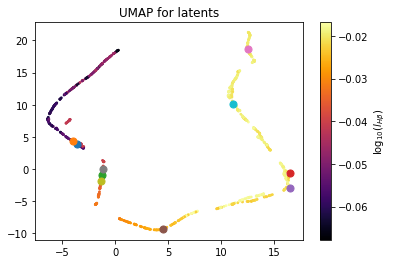

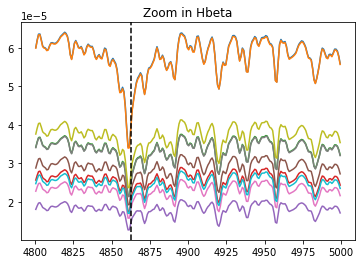

In [42]:
#lets try to see the dependance of the UMAP for latents with Hbeta

color=['tab:blue','tab:orange','tab:green','tab:red','tab:purple','tab:brown','tab:pink','tab:gray','tab:olive','tab:cyan','gold']

#the maximum is to avoid divergences
plt.scatter(embed[:,0], embed[:,1], s=3, c=np.log10(np.maximum(1e-2,l(l_center=4863))), rasterized=True, cmap='inferno')
plt.colorbar(label=r'$\log_{10}(l_{H \beta})$')
plt.title('UMAP for latents')
for i,ind in enumerate(np.arange(0,1000,100)):
    plt.scatter(embed[ind,0], embed[ind,1], s=50, c=color[i], rasterized=True, cmap='inferno')
plt.show()


sel = (wave > 4800 ) & (wave < 5000)
diff = x_test[:,sel]

for i,ind in enumerate(np.arange(0,1000,100)):
    plt.plot(wave[sel],diff[ind,:],color=color[i])
plt.axvline(4863,0,1,ls='--',c='k')
plt.title('Zoom in Hbeta')
plt.show()

## OII

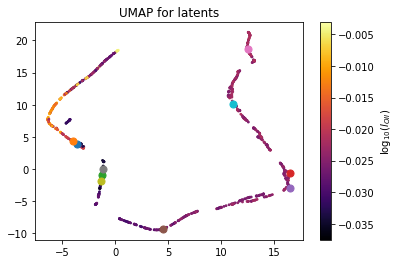

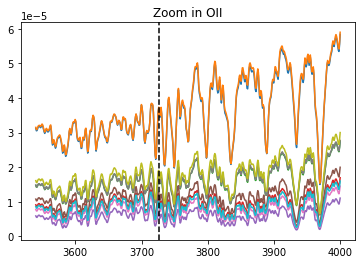

In [43]:
#lets try to see the dependance of the UMAP for latents with OII

color=['tab:blue','tab:orange','tab:green','tab:red','tab:purple','tab:brown','tab:pink','tab:gray','tab:olive','tab:cyan','gold']

#the maximum is to avoid divergences
plt.scatter(embed[:,0], embed[:,1], s=3, c=np.log10(np.maximum(1e-2,l(l_center=3727))), rasterized=True, cmap='inferno')
plt.colorbar(label=r'$\log_{10}(l_{OII})$')
plt.title('UMAP for latents')
for i,ind in enumerate(np.arange(0,1000,100)):
    plt.scatter(embed[ind,0], embed[ind,1], s=50, c=color[i], rasterized=True, cmap='inferno')
plt.show()


sel = (wave > 3000 ) & (wave < 4000)
diff = x_test[:,sel]

for i,ind in enumerate(np.arange(0,1000,100)):
    plt.plot(wave[sel],diff[ind,:],color=color[i])
plt.axvline(3727,0,1,ls='--',c='k')
plt.title('Zoom in OII')
plt.show()

## Correlation between latents and spectrum regions

<AxesSubplot:>

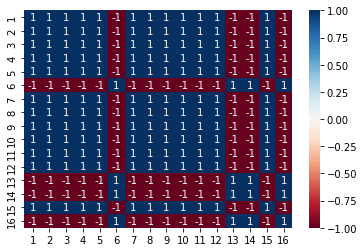

In [6]:
#first correlations inside the latents

import pandas as pd
import seaborn as sns

latents_short=latents[:50,:]


latent_data=pd.DataFrame(latents_short, columns = [str(i) for i in range(1,17)])

corr = latent_data.corr()

sns.heatmap(corr, cmap='RdBu',vmin=-1, vmax=1,annot=True)
